### IMPORT THE REQUIRED LIBRARIES

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [64]:
dataset = pd.read_csv("ML task 1 Data house_price.csv")

In [66]:
df = pd.DataFrame(dataset)

In [68]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [88]:
X = df.iloc[:, :-1].values #This selects all rows (:) and all columns except the last one (: - 1). The -1 excludes the last column.
y = df.iloc[:, -1].values #This selects all rows (:) and only the last column (-1) of the DataFrame df.

In [84]:
print(X)

[['Electronic City Phase II' '2 BHK' 1056.0 2.0 39.07 2]
 ['Chikka Tirupathi' '4 Bedroom' 2600.0 5.0 120.0 4]
 ['Uttarahalli' '3 BHK' 1440.0 2.0 62.0 3]
 ...
 ['Raja Rajeshwari Nagar' '2 BHK' 1141.0 2.0 60.0 2]
 ['Padmanabhanagar' '4 BHK' 4689.0 4.0 488.0 4]
 ['Doddathoguru' '1 BHK' 550.0 1.0 17.0 1]]


In [92]:
print(y)

[ 3699  4615  4305 ...  5258 10407  3090]


### 4- Identifying and handling the missing values


In data preprocessing, it is pivotal to identify and correctly handle the missing values, failing to do this, you might draw inaccurate and faulty conclusions and inferences from the data. Needless to say, this will hamper your ML project.

some typical reasons why data is missing:

A. User forgot to fill in a field.

B. Data was lost while transferring manually from a legacy database.

C. There was a programming error.

D. Users chose not to fill out a field tied to their beliefs about how the results would be used or interpreted.

Basically, there are two ways to handle missing data:

Deleting a particular row – In this method, you remove a specific row that has a null value for a feature or a particular column where more than 75% of the values are missing. However, this method is not 100% efficient, and it is recommended that you use it only when the dataset has adequate samples. You must ensure that after deleting the data, there remains no addition of bias. Calculating the mean – This method is useful for features having numeric data like age, salary, year, etc. Here, you can calculate the mean, median, or mode of a particular feature or column or row that contains a missing value and replace the result for the missing value. This method can add variance to the dataset, and any loss of data can be efficiently negated. Hence, it yields better results compared to the first method (omission of rows/columns). Another way of approximation is through the deviation of neighbouring values. However, this works best for linear data.

In [96]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

### SCIKIT Learn

In [107]:
X

array([['Electronic City Phase II', '2 BHK', 1056.0, 2.0, 39.07, 2],
       ['Chikka Tirupathi', '4 Bedroom', 2600.0, 5.0, 120.0, 4],
       ['Uttarahalli', '3 BHK', 1440.0, 2.0, 62.0, 3],
       ...,
       ['Raja Rajeshwari Nagar', '2 BHK', 1141.0, 2.0, 60.0, 2],
       ['Padmanabhanagar', '4 BHK', 4689.0, 4.0, 488.0, 4],
       ['Doddathoguru', '1 BHK', 550.0, 1.0, 17.0, 1]], dtype=object)

In [117]:
df.describe()


,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


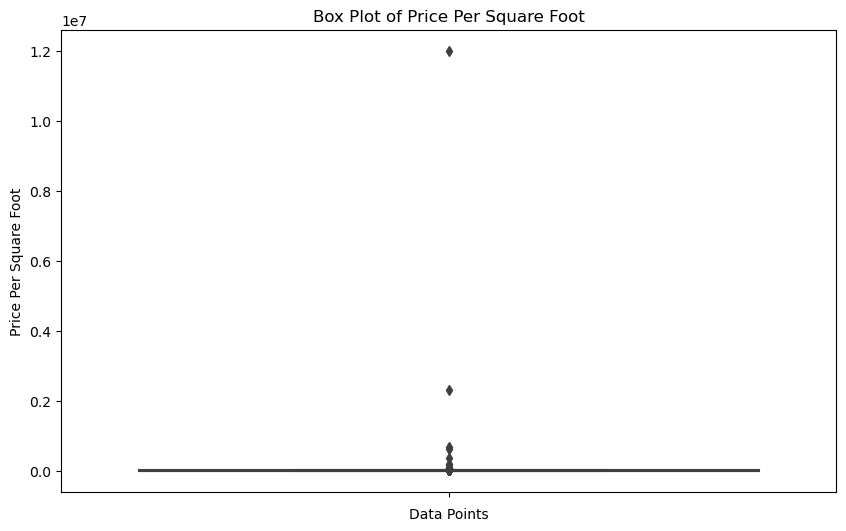

In [160]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['price_per_sqft'])
plt.xlabel('Data Points')
plt.ylabel('Price Per Square Foot')
plt.title('Box Plot of Price Per Square Foot')
plt.show()

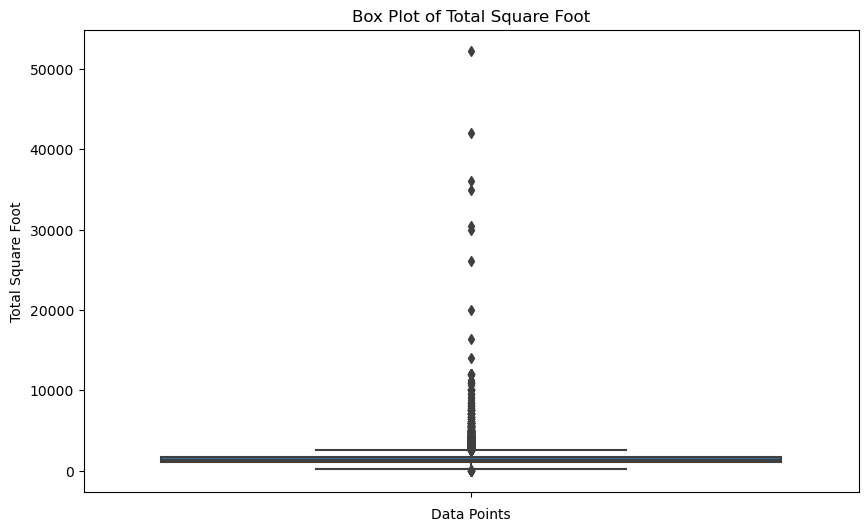

In [162]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['total_sqft'])
plt.xlabel('Data Points')
plt.ylabel('Total Square Foot')
plt.title('Box Plot of Total Square Foot')
plt.show()

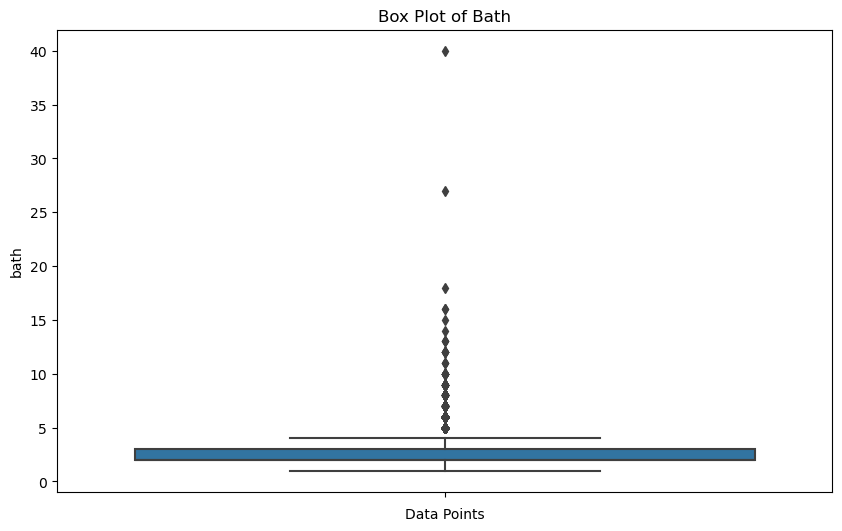

In [164]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['bath'])
plt.xlabel('Data Points')
plt.ylabel('bath')
plt.title('Box Plot of Bath')
plt.show()

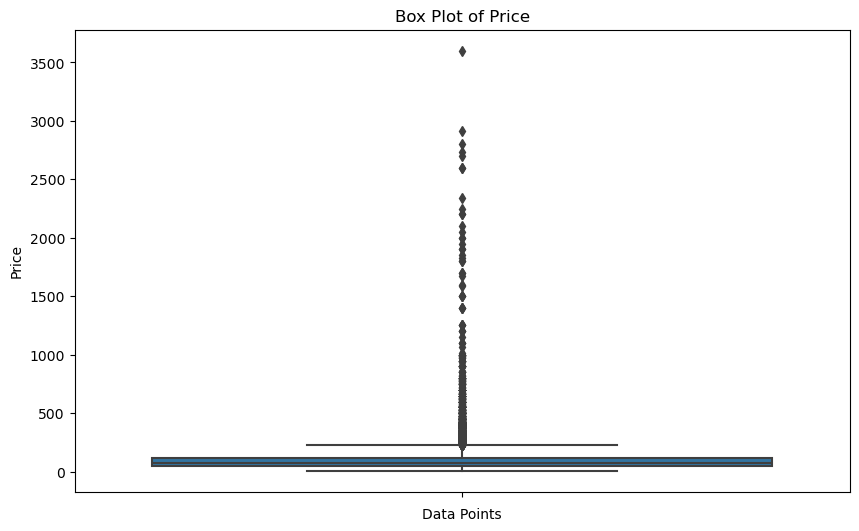

In [166]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['price'])
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Box Plot of Price')
plt.show()

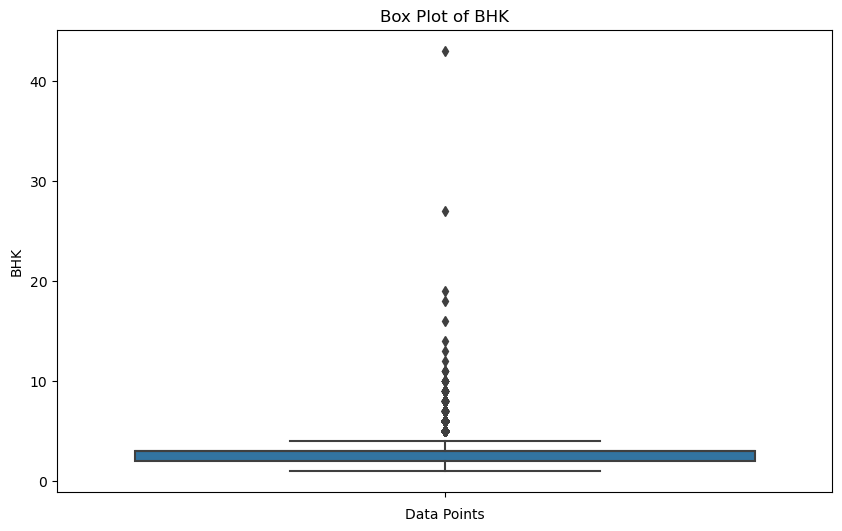

In [168]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['bhk'])
plt.xlabel('Data Points')
plt.ylabel('BHK')
plt.title('Box Plot of BHK')
plt.show()

In [172]:
df =df.dropna()

### Create scatter plot

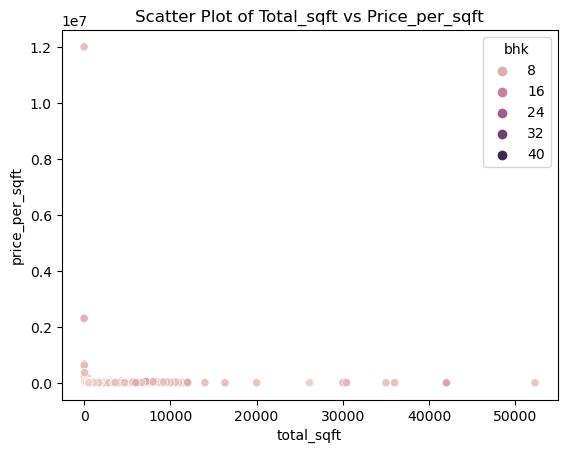

In [174]:
# Create scatter plot
sns.scatterplot(x="total_sqft", y="price_per_sqft", hue="bhk", data=df)
# Add labels and title
plt.xlabel("total_sqft")
plt.ylabel("price_per_sqft")
plt.title("Scatter Plot of Total_sqft vs Price_per_sqft")

# Show plot
plt.show()

### Create scatter plot

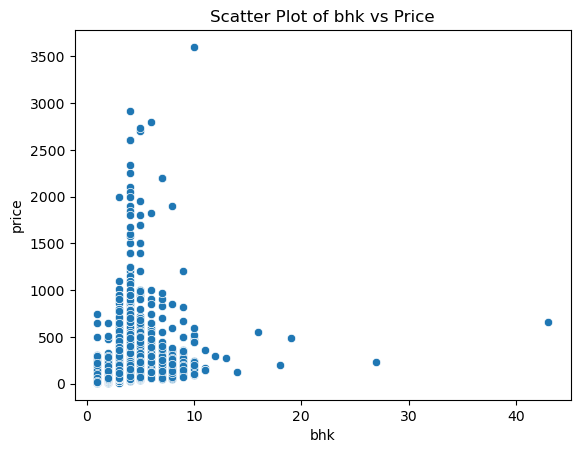

In [176]:
# Create scatter plot
sns.scatterplot(x="bhk", y="price",  data=df)
# Add labels and title
plt.xlabel("bhk")
plt.ylabel("price")
plt.title("Scatter Plot of bhk vs Price")

# Show plot
plt.show()

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


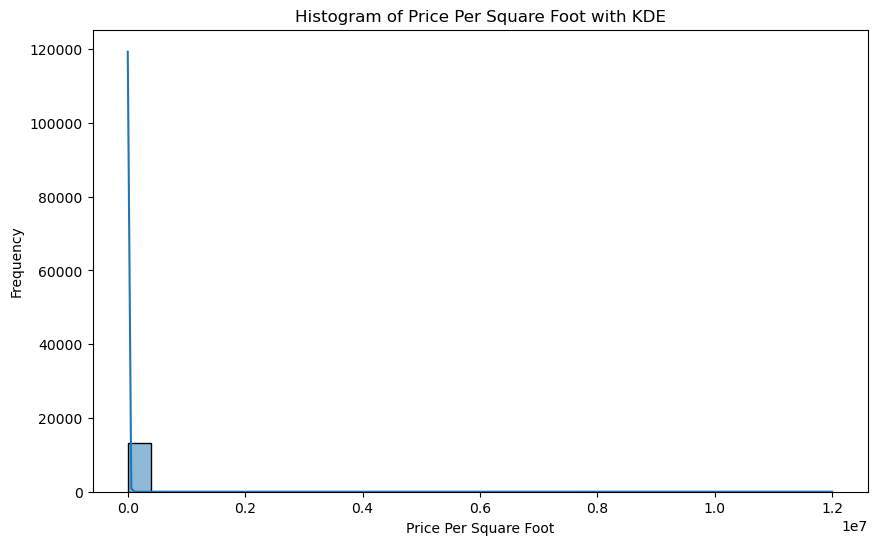

In [180]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], kde=True, bins=30)
plt.xlabel('Price Per Square Foot')
plt.ylabel('Frequency')
plt.title('Histogram of Price Per Square Foot with KDE')
plt.show()

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


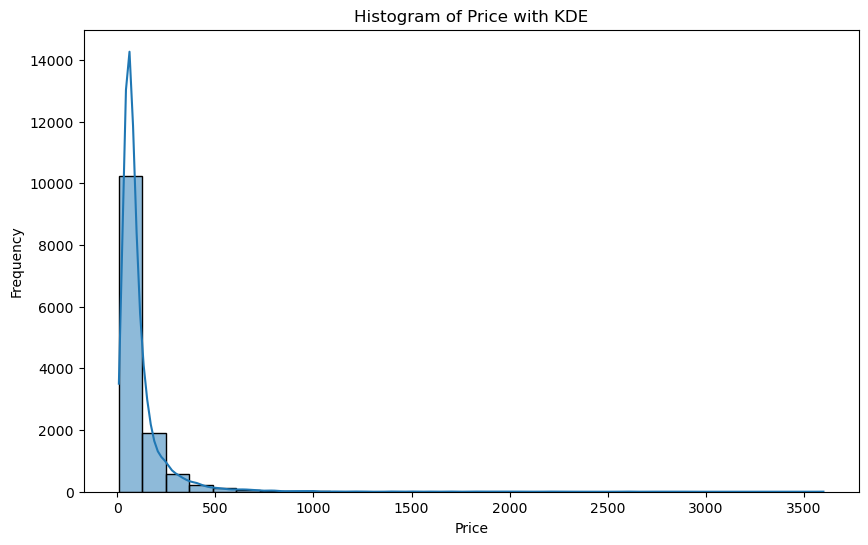

In [182]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price with KDE')
plt.show()

In [188]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [190]:
df_dropped = df.drop(columns=['location', 'size', 'bath'])

In [192]:
df_dropped

,total_sqft,price,bhk,price_per_sqft
0,1056.0,39.07,2,3699
1,2600.0,120.00,4,4615
2,1440.0,62.00,3,4305
3,1521.0,95.00,3,6245
4,1200.0,51.00,2,4250
...,...,...,...,...
13195,3453.0,231.00,5,6689
13196,3600.0,400.00,4,11111
13197,1141.0,60.00,2,5258
13198,4689.0,488.00,4,10407


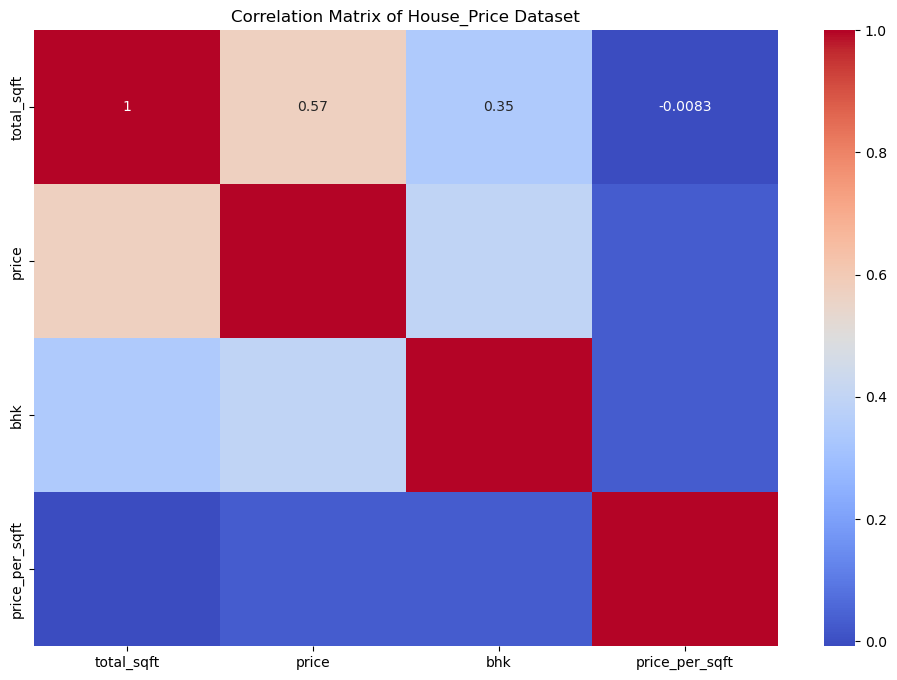

In [194]:
# Correlation Analysis
correlation_matrix = df_dropped.corr()

# Visualization: Heatmap for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of House_Price Dataset")
plt.show()



### Outlier Detection and Removal Functions

In [136]:
mean = df.price_per_sqft.mean()
mean

7920.336742424242

In [138]:
std = df.price_per_sqft.std()
std

106727.16032810845

In [140]:
lower_limit = mean - 2*std
upper_limit = mean + 2*std
print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)

upper_limit: 221374.65739864114
lower_limit: -205533.98391379268


In [142]:
New_df = df.copy()

In [144]:
New_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [146]:
new_df = df[(df.price_per_sqft<lower_limit)|(df.price_per_sqft>upper_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:', len(new_df))
print('outliers:' , len(df) - len(new_df))

before removing outliers: 13200
after removing outliers: 5
outliers: 13195


In [150]:
updated_df = df[(df.price_per_sqft>lower_limit) & (df.price_per_sqft<upper_limit)]
updated_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [152]:
updated_df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13195.000000,13195.00000,13195.000000,13195.000000,13195.000000
mean,1555.884482,2.69064,112.267415,2.800152,6713.708602
std,1237.196807,1.33853,149.200669,1.292344,4876.727718
min,15.000000,1.00000,8.000000,1.000000,267.000000
25%,1100.000000,2.00000,50.000000,2.000000,4266.500000
50%,1275.000000,2.00000,71.740000,3.000000,5434.000000
75%,1672.500000,3.00000,120.000000,3.000000,7313.000000
max,52272.000000,40.00000,3600.000000,43.000000,200000.000000


C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Count'>

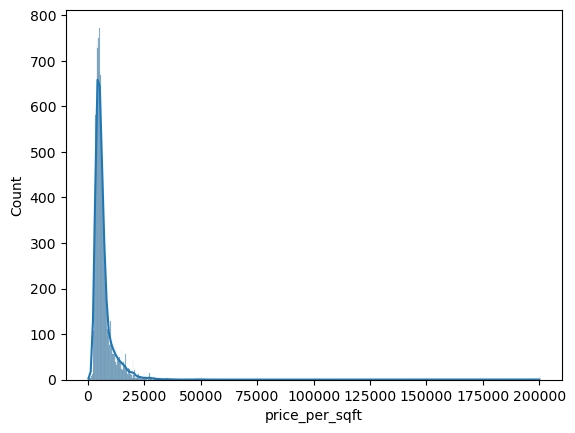

In [196]:
sns.histplot(data = updated_df, x = updated_df.price_per_sqft, kde = True)

<Axes: >

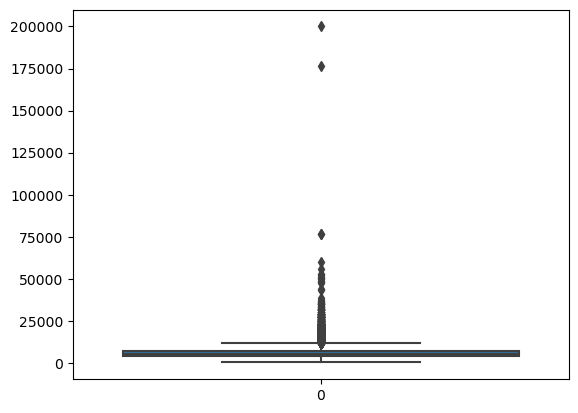

In [198]:
sns.boxplot(updated_df['price_per_sqft'])

### Percentile Method

In [201]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [203]:
df = df.dropna()

In [221]:
lower_limit = df['price_per_sqft'].quantile(0.05)
lower_limit

3107.8500000000004

In [223]:
df[df['price_per_sqft']>lower_limit]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [225]:
upper_limit = df['price_per_sqft'].quantile(0.95)
upper_limit

15312.099999999984

In [227]:
df[df['price_per_sqft']>upper_limit]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
69,other,3 Bedroom,500.0,3.0,100.0,3,20000
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [229]:
df1 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df1.shape

(11880, 7)

In [231]:
df1.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,11880.000000,11880.000000,11880.000000,11880.000000,11880.000000
mean,1526.834734,2.631397,98.746204,2.732660,6134.521380
std,900.548874,1.172290,88.614835,1.109424,2505.693062
min,276.000000,1.000000,13.500000,1.000000,3108.000000
25%,1108.000000,2.000000,51.180000,2.000000,4380.000000
50%,1290.000000,2.000000,71.000000,3.000000,5438.000000
75%,1670.000000,3.000000,111.000000,3.000000,7024.500000
max,30400.000000,16.000000,2100.000000,16.000000,15311.000000


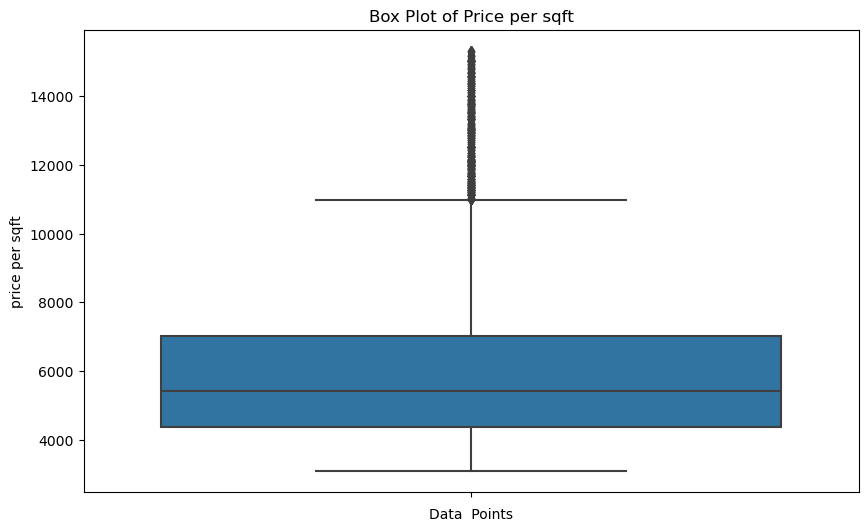

In [235]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df1['price_per_sqft'])
plt.xlabel('Data  Points')
plt.ylabel('price per sqft')
plt.title('Box Plot of Price per sqft')
plt.show()

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


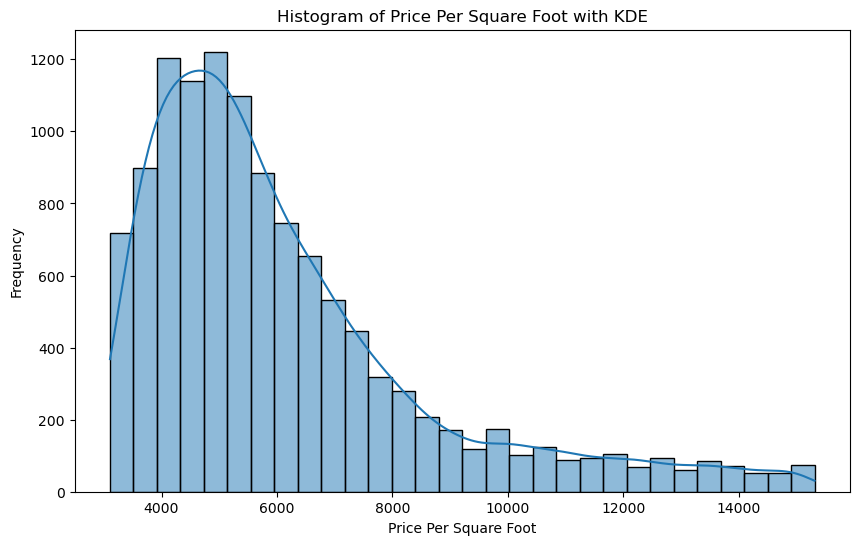

In [237]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['price_per_sqft'], kde=True, bins=30)
plt.xlabel('Price Per Square Foot')
plt.ylabel('Frequency')
plt.title('Histogram of Price Per Square Foot with KDE')
plt.show()

###  Inter Quartile Range

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [242]:
Q1 = df.price_per_sqft.quantile(0.25)
Q1

4267.0

In [244]:
Q3 = df.price_per_sqft.quantile(0.75)
Q3

7317.0

In [246]:
Q1, Q3

(4267.0, 7317.0)

In [248]:
IQR = Q3 -Q1
IQR

3050.0

In [250]:
iqr_lower_limit = Q1 - (1.5*IQR)
iqr_upper_limit = Q3 + (1.5*IQR)
iqr_lower_limit, iqr_upper_limit

(-308.0, 11892.0)

In [252]:
df[(df.price_per_sqft < iqr_lower_limit ) | (df.price_per_sqft < iqr_upper_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [254]:
iqr_df = df[(df.price_per_sqft > iqr_lower_limit ) & (df.price_per_sqft < iqr_upper_limit)]
iqr_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [256]:
iqr_df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,11935.000000,11935.000000,11935.000000,11935.000000,11935.000000
mean,1514.629659,2.533641,87.654926,2.644826,5575.925513
std,1195.959790,1.111145,73.154677,1.051124,1957.779783
min,276.000000,1.000000,8.000000,1.000000,267.000000
25%,1100.000000,2.000000,48.000000,2.000000,4166.000000
50%,1270.000000,2.000000,66.780000,2.000000,5188.000000
75%,1634.500000,3.000000,100.000000,3.000000,6603.000000
max,52272.000000,27.000000,2100.000000,27.000000,11875.000000


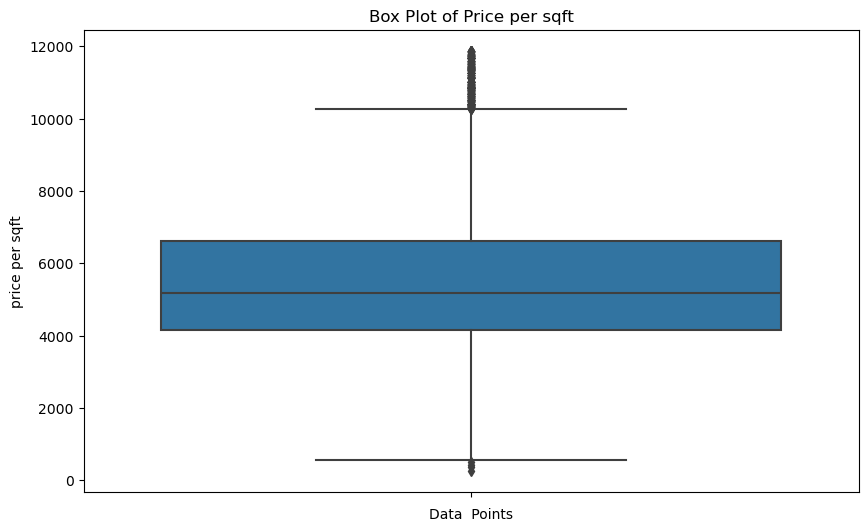

In [258]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=iqr_df['price_per_sqft'])
plt.xlabel('Data  Points')
plt.ylabel('price per sqft')
plt.title('Box Plot of Price per sqft')
plt.show()

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


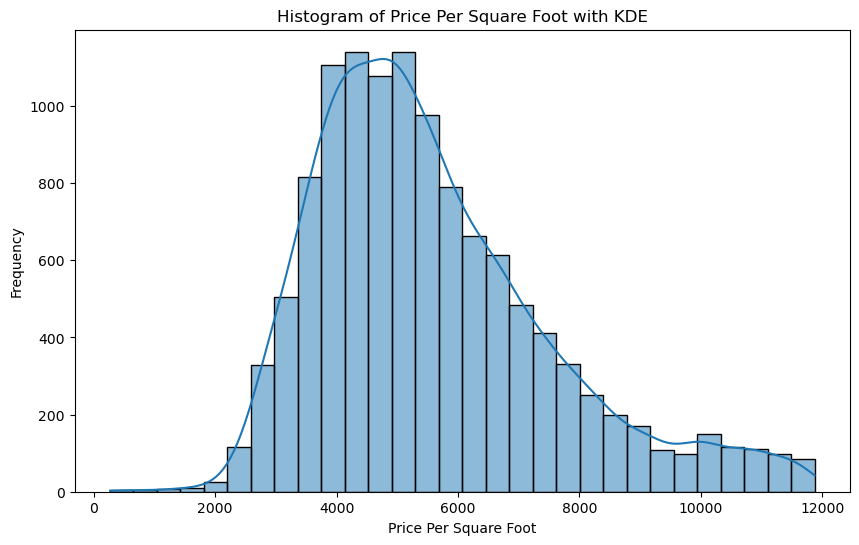

In [289]:
plt.figure(figsize=(10, 6))
sns.histplot(iqr_df['price_per_sqft'], kde=True, bins=30)
plt.xlabel('Price Per Square Foot')
plt.ylabel('Frequency')
plt.title('Histogram of Price Per Square Foot with KDE')
plt.show()

### Normal Distribution

# Calculate the mean and standard deviation
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()

# Set the threshold (e.g., 3 standard deviations)
threshold = 3
upper_limit = mean + threshold * std
lower_limit = mean - threshold * std


In [264]:
lower_limit

-312261.1442419011

In [266]:
upper_limit

328101.8177267496

In [276]:
df[(df.price_per_sqft >upper_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [270]:
df.price_per_sqft < upper_limit

0        True
1        True
2        True
3        True
4        True
         ... 
13195    True
13196    True
13197    True
13198    True
13199    True
Name: price_per_sqft, Length: 13200, dtype: bool

In [278]:
Nor_df = df[(df.price_per_sqft > lower_limit) & (df.price_per_sqft < upper_limit)]
Nor_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [280]:
Nor_df.shape

(13195, 7)

In [282]:
Nor_df.price_per_sqft.mean()

6713.708601743085

In [284]:
Nor_df.price_per_sqft.skew()

10.477808563841766

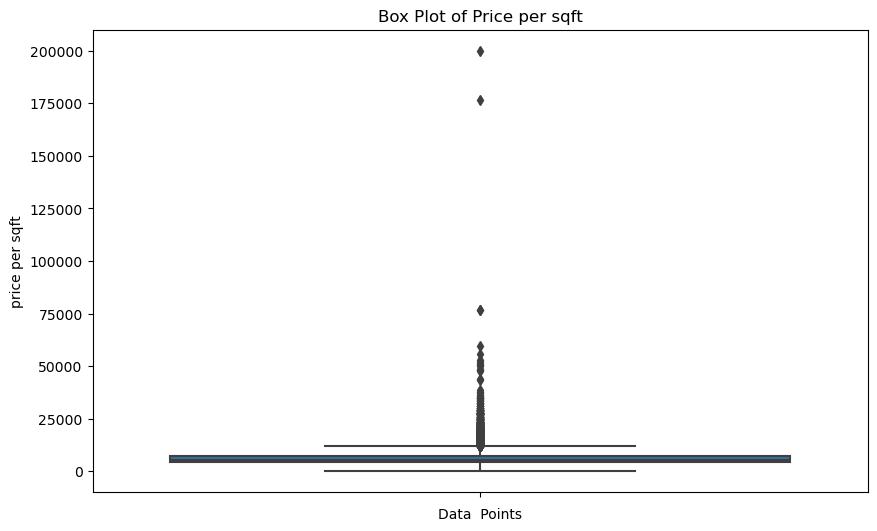

In [286]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=Nor_df['price_per_sqft'])
plt.xlabel('Data  Points')
plt.ylabel('price per sqft')
plt.title('Box Plot of Price per sqft')
plt.show()

C:\Users\Najma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


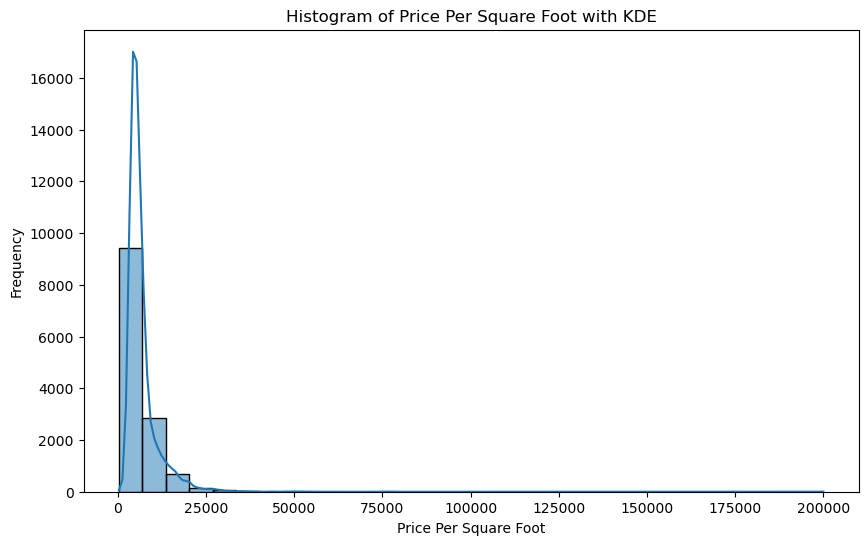

In [293]:
plt.figure(figsize=(10, 6))
sns.histplot(Nor_df['price_per_sqft'], kde=True, bins=30)
plt.xlabel('Price Per Square Foot')
plt.ylabel('Frequency')
plt.title('Histogram of Price Per Square Foot with KDE')
plt.show()

### ZSCORE METHOD



In [296]:
m = df.price_per_sqft.mean().round(2)
m

7920.34

In [304]:
s = df.price_per_sqft.std().round(1)
s

AttributeError: 'float' object has no attribute 'round'

## z_df = df.copy()
z_df['zscore'] = (df.price_per_sqft - m)/s
z_df